In [1]:
## importing required library
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns", None)

In [2]:
wine = pd.read_csv("./wine reviews_small.csv")

In [3]:
## Droping unwanted column
wine.drop("Unnamed: 0", axis=1, inplace=True)

## EDA

In [4]:
for feature in wine.columns:
    print("The unique values in ", feature, "is", wine[feature].nunique())

The unique values in  country is 41
The unique values in  description is 29169
The unique values in  designation is 13454
The unique values in  points is 21
The unique values in  price is 242
The unique values in  province is 330
The unique values in  region_1 is 964
The unique values in  region_2 is 17
The unique values in  taster_name is 19
The unique values in  taster_twitter_handle is 15
The unique values in  title is 29107
The unique values in  variety is 478
The unique values in  winery is 9881


In [5]:
## Creating variable having all the numerical feature
numeric_feature = [feature for feature in wine.columns if wine[feature].dtype != "O"]
numeric_feature

['points', 'price']

In [6]:
## Creating variable having catogorical Feature names
cat_feature = [feature for feature in wine.columns if wine[feature].dtype == "O"]
cat_feature

['country',
 'description',
 'designation',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle',
 'title',
 'variety',
 'winery']

In [7]:
## feature with Nan or missing Values
feature_with_nan = [
    feature for feature in wine.columns if wine[feature].isnull().sum() > 0
]
feature_with_nan

['country',
 'designation',
 'price',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle']

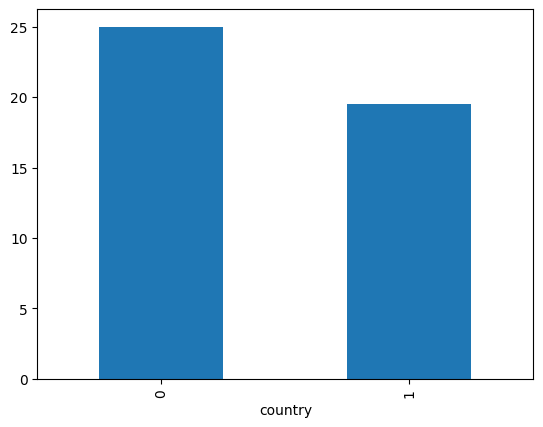

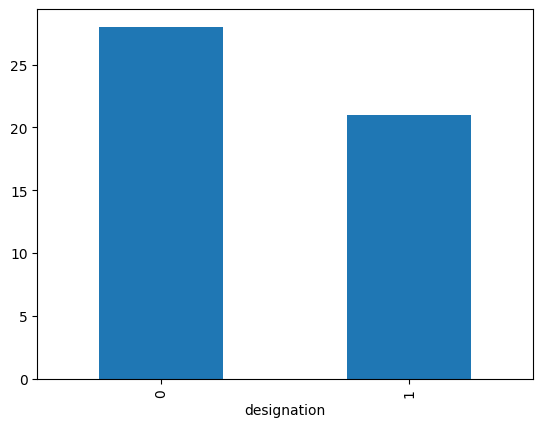

In [8]:
## checking the relation between missing values and dependent feature
feature_with_nans = ["country", "designation"]
data = wine.copy()
for feature in feature_with_nans:
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    data.groupby(feature)["price"].median().plot.bar()
    plt.show()

#The Nan values Have no realtion with output feature so we can replace the values by Median 

In [9]:
wine.isnull().sum()
## data having more missing values so we drop the some of unwanted columns
data = wine.copy()
data.drop(["region_2", "taster_twitter_handle", "region_1"], axis=1, inplace=True)

In [10]:
## price feature missing values is replaced by median
data["price"] = data["price"].fillna(data["price"].median())

<AxesSubplot:xlabel='price', ylabel='Density'>

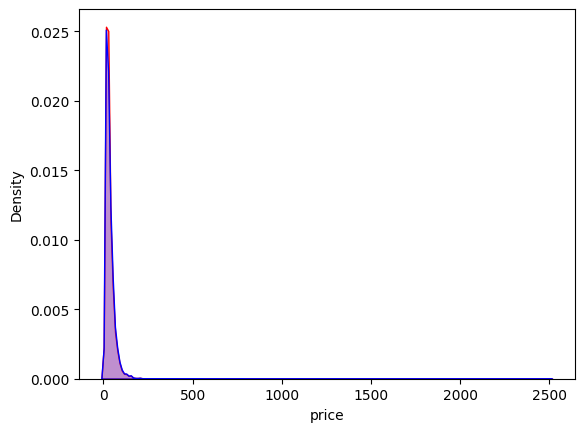

In [11]:
## their is no change in distribution
sns.kdeplot(data["price"], color="r", label="without nan", shade=True)
sns.kdeplot(wine["price"], color="b", label="with nan", shade=True)

In [12]:
data.dropna(subset=["country"], inplace=True)

In [13]:
## missing values is replace as 'Missing'
data["designation"].fillna("Missing", inplace=True)
data["taster_name"].fillna("Missing", inplace=True)
data.drop_duplicates().isnull().sum()

country        0
description    0
designation    0
points         0
price          0
province       0
taster_name    0
title          0
variety        0
winery         0
dtype: int64

In [14]:
## exporting the Clean Csv
data.to_csv("wine_review_clean.csv")

In [15]:
## Now the Data is clean so WE CAN START ANALYSISNG
## univarient analysis

# univarient analysis

In [16]:
data.head()

,country,description,designation,points,price,province,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,25.0,Sicily & Sardinia,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",Missing,87,14.0,Oregon,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


<AxesSubplot:xlabel='price', ylabel='Density'>

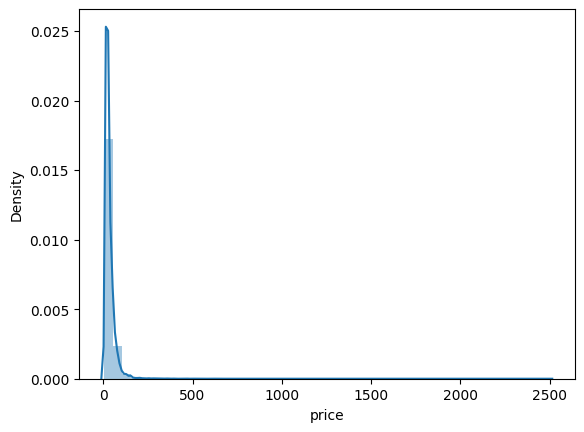

In [17]:
# distribution of numeric variable
sns.distplot(data["price"])

The feature price is right skewed

<AxesSubplot:xlabel='points', ylabel='Density'>

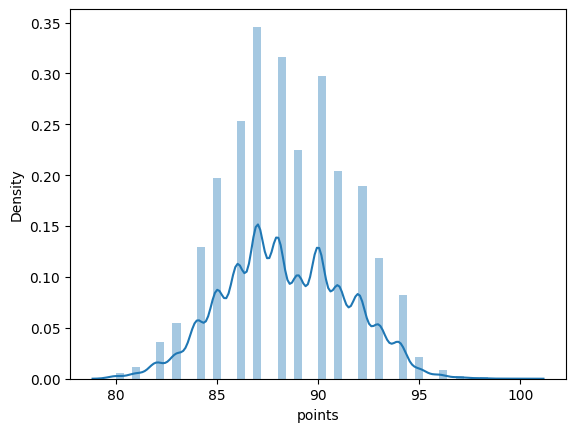

In [18]:
sns.distplot(data["points"])

the points feature more or less follows normal distribution

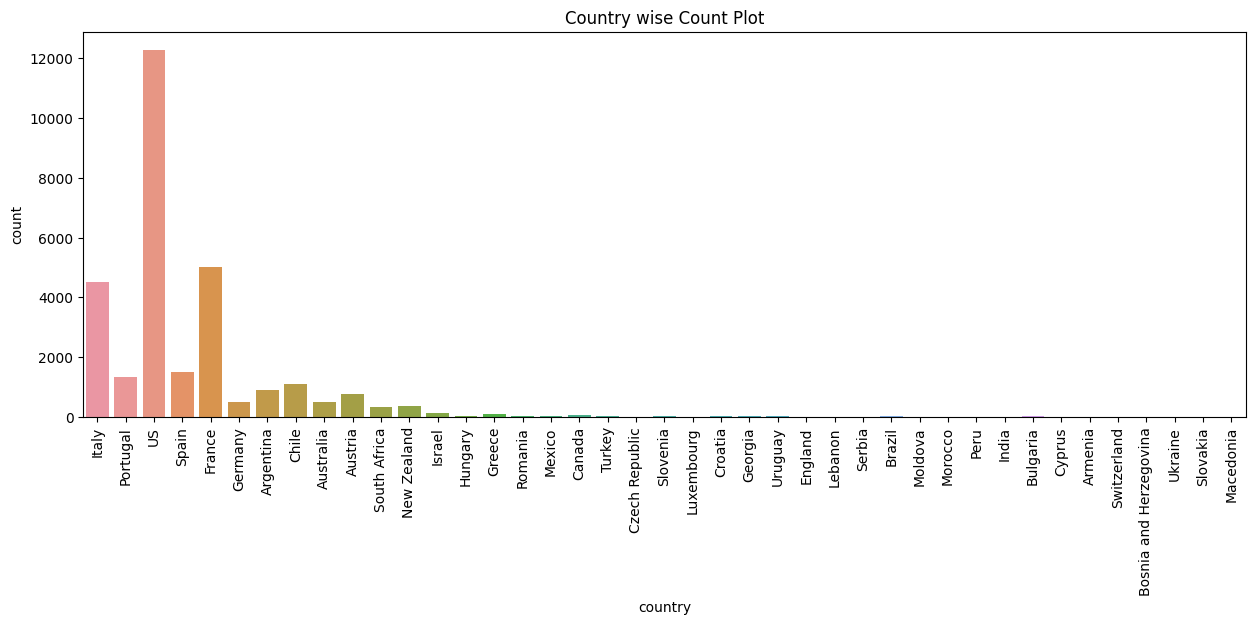

In [19]:
# country feature count plot
plt.figure(figsize=(15, 5))
sns.countplot(data["country"]).set_title("Country wise Count Plot")
a = plt.xticks(rotation=90)

In this reviews the most of the wine is from United States over 12000 and after that France

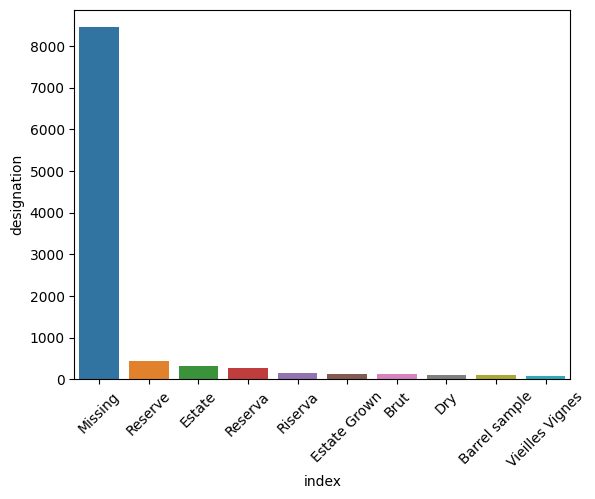

In [20]:
# Designation: the vineyard within the winery where the grapes that made the wine are from
desig = data["designation"].value_counts().reset_index()
sns.barplot(data=desig.head(10), x="index", y="designation")
a = plt.xticks(rotation=45)

So we can see the above plot it shows the designation has more missing values after tha 'reserver designation' is more in the review Dataset

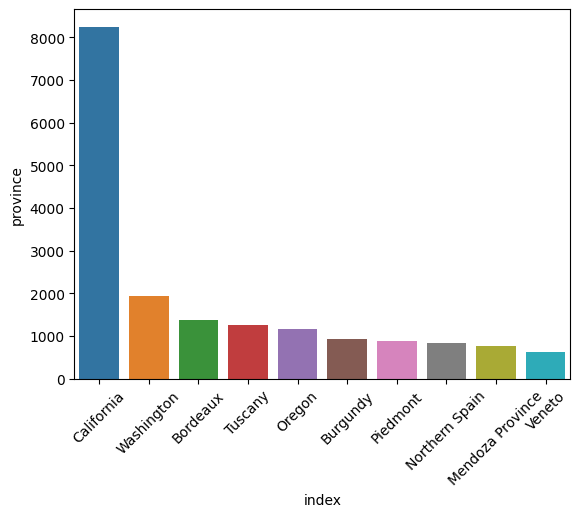

In [21]:
prov = data["province"].value_counts().reset_index()
sns.barplot(data=prov.head(10), x="index", y="province")
a = plt.xticks(rotation=45)

The Data set of wine reviews the state california is having more counts and next is Washington

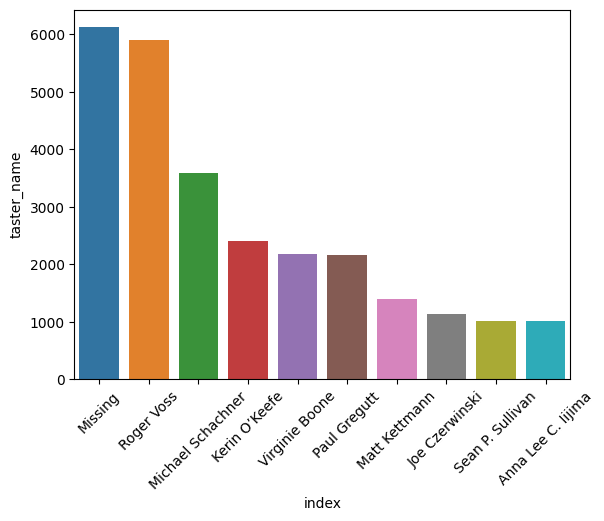

In [22]:
taster_name = data["taster_name"].value_counts().reset_index()
sns.barplot(data=taster_name.head(10), x="index", y="taster_name")
a = plt.xticks(rotation=45)

The plot show that many people tast the wine are not provide the name so many values are missing

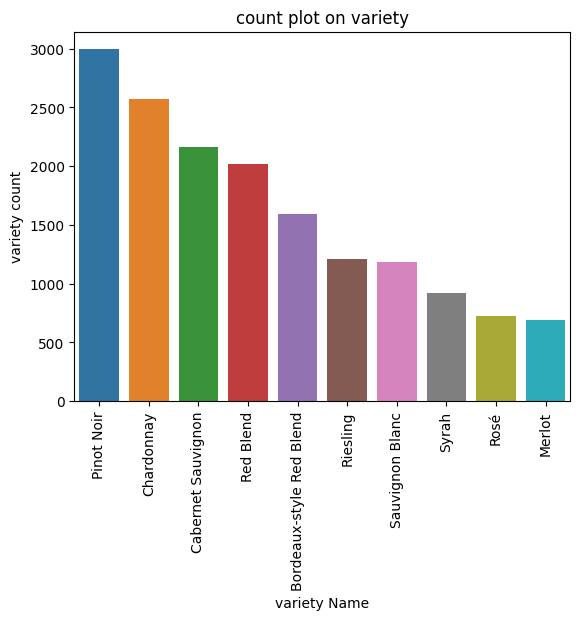

In [23]:
variety = data["variety"].value_counts().reset_index()
sns.barplot(data=variety.head(10), x="index", y="variety").set_title(
    "count plot on variety"
)
plt.xlabel("variety Name")
plt.ylabel("variety count")
a = plt.xticks(rotation=90)

The variety pinot Noir wine is tasted many time in the wine review data over 3000 times

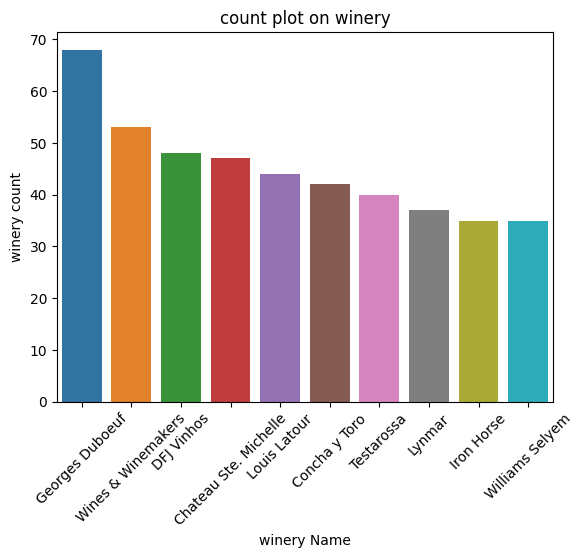

In [24]:
winery = data["winery"].value_counts().reset_index()
sns.barplot(data=winery.head(10), x="index", y="winery").set_title(
    "count plot on winery"
)
plt.xlabel("winery Name")
plt.ylabel("winery count")
a = plt.xticks(rotation=45)

The winery Georges Duboeuf is the most tasted wine based on this wine Dataset

# Multivariant Analysis

<AxesSubplot:xlabel='country'>

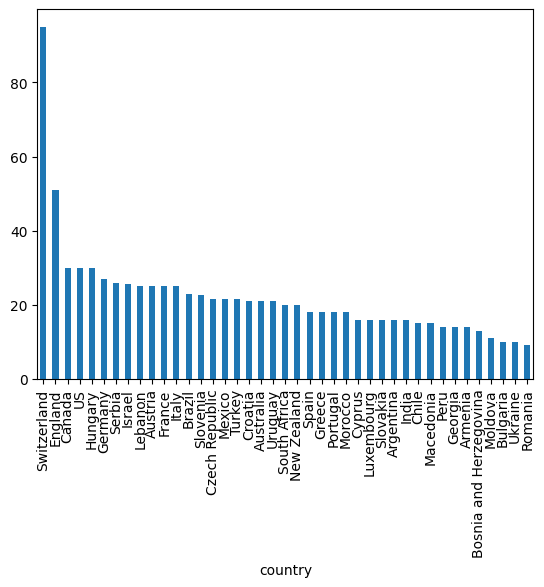

In [25]:
data.groupby("country")["price"].median().sort_values(ascending=False).plot.bar()

The Swizerland wine are most costly among the other country

<AxesSubplot:xlabel='country'>

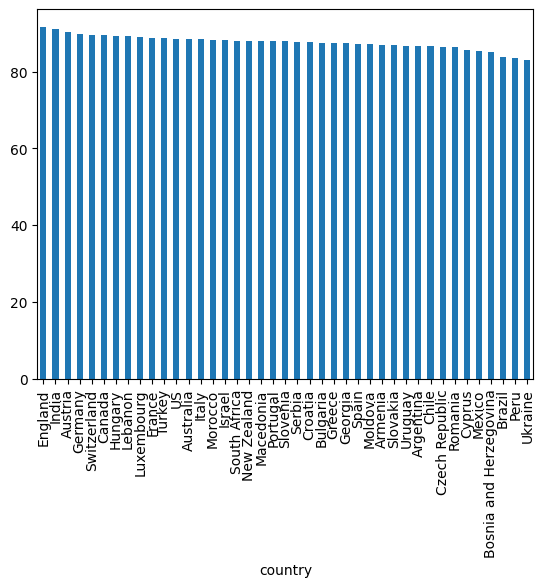

In [26]:
data.groupby("country")["points"].mean().sort_values(ascending=False).plot.bar()

England is the country which having high average points

In [27]:
## varibale with 50 or less tha 50 unique categories
cat_feature_50 = [feature for feature in data.columns if data[feature].dtype == "O"]
cat_feature_50

['country',
 'description',
 'designation',
 'province',
 'taster_name',
 'title',
 'variety',
 'winery']

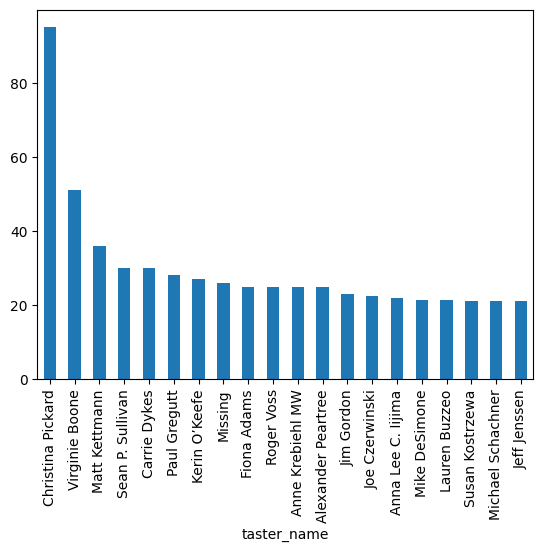

In [28]:
for feature in cat_feature_50:
    if data[feature].nunique() < 50:
        datas = (
            data.groupby(feature)["price"]
            .median()
            .sort_values(ascending=False)
            .plot.bar()
        )

The taster_name feature is about the people who tast the wine the most wine tasted by Christina pickard

In [29]:
## log Trasnform
data["pricelog"] = np.log1p(data["price"])

<AxesSubplot:xlabel='points', ylabel='pricelog'>

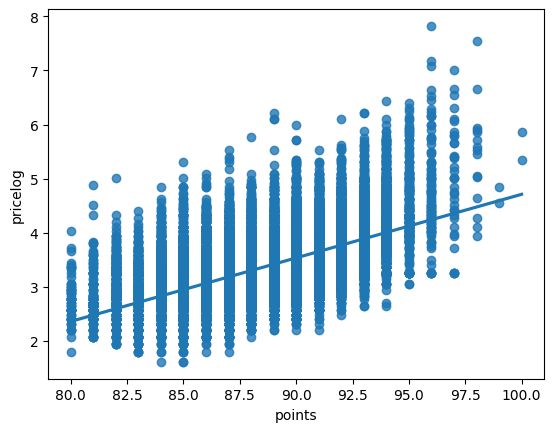

In [30]:
##vReg plot
sns.regplot(y=data["pricelog"], x=data["points"])

Text(0.5, 1.0, 'after Log transform on price')

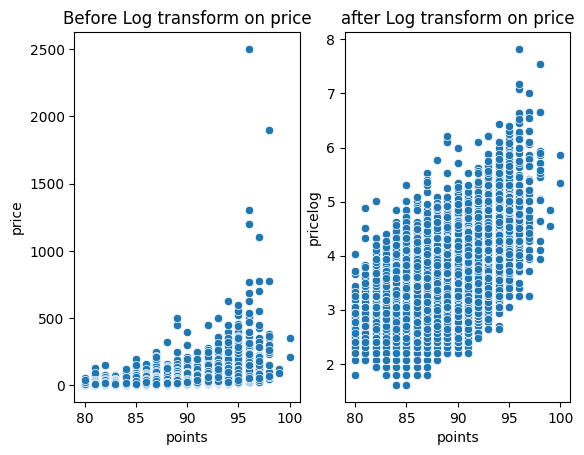

In [31]:
fig, ax = plt.subplots(1, 2)
sns.scatterplot(data=data, y="price", x="points", ax=ax[0]).set_title(
    "Before Log transform on price"
)
sns.scatterplot(data=data, y="pricelog", x="points", ax=ax[1]).set_title(
    "after Log transform on price"
)

In [32]:
## correlatio before log transform
print("before applying log")
print(data[["points", "price"]].corr())
## correlatio after log transform
print("after applying log")
print(data[["points", "pricelog"]].corr())

before applying log
          points     price
points  1.000000  0.400483
price   0.400483  1.000000
after applying log
            points  pricelog
points    1.000000  0.585642
pricelog  0.585642  1.000000


There is a strong relation between the (price and point) 
The correlation of price and points is 40% before log  transform
The correlation of price and points is 58% after log transform
it shows that the log transform make the distribution close to normal

In [33]:
top_5_country = list(
    data["country"]
    .value_counts()
    .sort_values(ascending=False)
    .reset_index()["index"]
    .head()
)
top_5_country
top_5_co = data[data["country"].isin(top_5_country)]

<AxesSubplot:xlabel='points', ylabel='pricelog'>

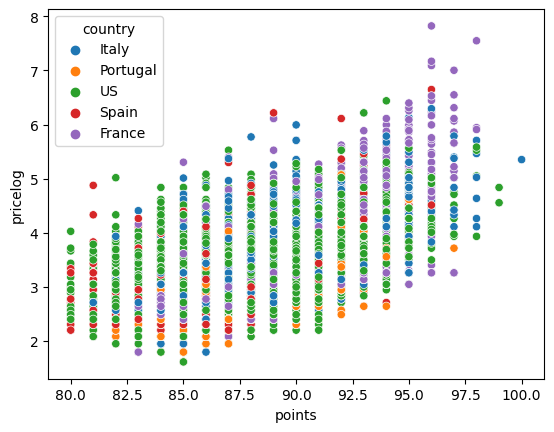

In [34]:
## Top 5 country in sactter plot
sns.scatterplot(data=data, x="points", y="pricelog", hue=top_5_co["country"])

Top 5 countrys points plotted in scatter plot it shows mostly the points are from US

In [35]:
for feature in data.columns:
    print("The unique values in ", feature, "is", data[feature].nunique())

The unique values in  country is 41
The unique values in  description is 29154
The unique values in  designation is 13445
The unique values in  points is 21
The unique values in  price is 242
The unique values in  province is 330
The unique values in  taster_name is 20
The unique values in  title is 29092
The unique values in  variety is 474
The unique values in  winery is 9873
The unique values in  pricelog is 242


In [36]:
data.groupby(["country", "winery", "variety", "province"])[
    "price"
].median().sort_values(ascending=False).reset_index()

,country,winery,variety,province,price
0,France,Château Pétrus,Bordeaux-style Red Blend,Bordeaux,2500.0
1,Spain,Marco Abella,Carignan,Catalonia,770.0
2,France,Château Haut-Brion,Bordeaux-style Red Blend,Bordeaux,765.0
3,France,Château La Mission Haut-Brion,Bordeaux-style White Blend,Bordeaux,698.0
4,US,Yao Ming,Cabernet Sauvignon,California,625.0
...,...,...,...,...,...
18622,Argentina,Terrenal,Malbec,Mendoza Province,5.0
18623,US,Gallo Family Vineyards,Pinot Grigio,California,5.0
18624,US,Dancing Coyote,White Blend,California,4.0
18625,Argentina,Broke Ass,Malbec-Syrah,Mendoza Province,4.0


In [37]:
data.groupby(["country", "winery", "variety", "province"])["points"].mean().sort_values(
    ascending=False
).reset_index()

,country,winery,variety,province,points
0,US,Quilceda Creek,Cabernet Sauvignon,Washington,99.0
1,Italy,Passopisciaro,Nerello Mascalese,Sicily & Sardinia,97.0
2,Italy,Tenuta dell'Ornellaia,Red Blend,Tuscany,97.0
3,France,Château La Mission Haut-Brion,Bordeaux-style White Blend,Bordeaux,97.0
4,France,Château Haut-Brion,Bordeaux-style Red Blend,Bordeaux,96.5
...,...,...,...,...,...
18622,US,Cooper Vineyards,Red Blend,Virginia,80.0
18623,Argentina,Villa Viña,Torrontés,Other,80.0
18624,France,Seigneurs de Bergerac,White Blend,Southwest France,80.0
18625,US,Greenwood Ridge,Sauvignon Blanc,California,80.0


In [38]:
data.groupby("province")["points"].mean().sort_values(ascending=False)

province
Mittelrhein                  94.000000
Eisenberg                    93.000000
Santa Cruz                   92.500000
Tokaji                       91.714286
England                      91.636364
                               ...    
San Jose                     82.500000
Serra do Sudeste             82.000000
Middle and South Dalmatia    82.000000
Molina                       82.000000
Table wine                   81.000000
Name: points, Length: 330, dtype: float64

## Sampling 

In [39]:
country_stata = data.groupby("country", group_keys=False).apply(
    lambda x: x.sample(100, replace=True)
)
country_stata.head(2)

,country,description,designation,points,price,province,taster_name,title,variety,winery,pricelog
23974,Argentina,"Deep in color, with raisiny, fully ripe and he...",Missing,85,17.0,Mendoza Province,Michael Schachner,Sottano 2010 Merlot (Mendoza),Merlot,Sottano,2.890372
1170,Argentina,"Apricot and oak aromas make for a smoky, sligh...",Broquel,86,17.0,Mendoza Province,Michael Schachner,Trapiche 2007 Broquel Chardonnay (Mendoza),Chardonnay,Trapiche,2.890372


In [40]:
country_stata.groupby("country")["price"].mean().sort_values(ascending=False)

country
Switzerland               92.40
Hungary                   61.28
England                   56.38
Germany                   45.21
Canada                    39.43
Lebanon                   35.62
Australia                 35.42
US                        32.95
Italy                     32.74
Austria                   32.46
France                    31.80
Israel                    30.66
Spain                     26.83
Mexico                    26.75
Uruguay                   26.62
Czech Republic            26.56
Croatia                   26.24
New Zealand               26.18
Serbia                    25.48
Slovenia                  25.10
Turkey                    23.47
Portugal                  23.46
Brazil                    22.87
South Africa              22.78
Morocco                   22.32
Greece                    20.23
Georgia                   19.47
Argentina                 18.87
Chile                     18.49
Moldova                   18.09
Cyprus                    16.08


After sampling equal proportion the 'Switzerland'  wine are More Costly

In [41]:
country_stata.groupby("country")["points"].mean().sort_values(ascending=False)

country
England                   91.40
India                     90.68
Austria                   90.45
Hungary                   89.72
Canada                    89.71
Germany                   89.62
Switzerland               89.52
Luxembourg                89.00
Lebanon                   88.92
Turkey                    88.67
Portugal                  88.60
Australia                 88.59
US                        88.35
Morocco                   88.26
France                    88.25
Italy                     88.21
South Africa              88.15
Israel                    88.09
New Zealand               88.05
Slovenia                  88.05
Macedonia                 88.00
Bulgaria                  87.76
Croatia                   87.72
Serbia                    87.54
Georgia                   87.41
Greece                    87.39
Armenia                   87.00
Slovakia                  87.00
Spain                     86.97
Moldova                   86.91
Uruguay                   86.69


After sampling england is having highest average points  (or) 
we can say that the wine from England are get high points form the taster in the wine review Dataset

In [42]:
# relation Between province and Price
data.groupby("province")["price"].median().sort_values(ascending=False)

province
Switzerland                  160.0
Puente Alto                  103.5
Santa Cruz                    95.0
Apalta                        82.0
Middle and South Dalmatia     65.0
                             ...  
Alenquer                       8.0
Dealurile Munteniei            8.0
Molina                         8.0
Recas                          7.0
Viile Timisului                7.0
Name: price, Length: 330, dtype: float64

The above Data having unequal proportion of province so we have to equal the proption for that we can use stratified Sampling

In [43]:
# Appling Stratified Sampling
province_stata = data.groupby("province", group_keys=False).apply(
    lambda x: x.sample(1000, replace=True)
)
province_stata.head(2)

,country,description,designation,points,price,province,taster_name,title,variety,winery,pricelog
2205,Chile,"Nutty aromas of popcorn, buttered toast, peach...",Missing,88,20.0,Aconcagua Costa,Michael Schachner,Arboleda 2014 Chardonnay (Aconcagua Costa),Chardonnay,Arboleda,3.044522
22217,Chile,"Punchy raspberry, plum and spice aromas are st...",Alpha,89,23.0,Aconcagua Costa,Michael Schachner,Montes 2014 Alpha Pinot Noir (Aconcagua Costa),Pinot Noir,Montes,3.178054


In [44]:
# after sampling grouping Province with Points to check which province have high average point
province_stata.groupby("province")["points"].median().sort_values(ascending=False)

province
Eisenberg                    94.0
Mittelrhein                  94.0
Waiheke Island               92.0
Wachau                       92.0
Leithaberg                   92.0
                             ... 
Ribatejano                   82.0
Juanico                      82.0
Middle and South Dalmatia    82.0
Molina                       82.0
Table wine                   81.0
Name: points, Length: 330, dtype: float64

In [45]:
# after sampling grouping Province with Price to check which province have high average price
province_stata.groupby("province")["price"].median().sort_values(ascending=False)

province
Switzerland        160.0
Santa Cruz          95.0
Puente Alto         87.0
Apalta              82.0
Epanomi             79.0
                   ...  
Molina               8.0
Viile Timisului      7.0
Primorska            7.0
Recas                7.0
Ribatejano           7.0
Name: price, Length: 330, dtype: float64

## Findings in this analysis
# Univariate 
##### 1 The Nan values Have no realtion with output feature so we can replace the values by Median 
##### 2 The points feature more or less follows normal distribution
##### 3 In this reviews the most of the wine is from 'United States' over 12000 and after that 'France'
##### 4 The designation has more missing values after tha 'reserver designation' is more in the review Dataset
##### 5 The Data set of wine reviews the state 'California' is having more counts and second is 'Washington'
##### 6 Many people tast the wine are not provide the name so many values are missing in Taster_Name feature
##### 7 The variety 'Pinot Noir' wine is tasted many time in the wine review data over 3000 times
##### 8 The winery 'Georges Duboeuf' is the most tasted wine based on this wine Dataset
# Multivariate
##### 1 The 'Swizerland' wine are most costly among the other country
##### 2 England is the country which having high average points
##### 3 The 'Price' Feature is Right Skewed so we can perform Log transform  
##### 4 There is a strong relation between the (price and point) 
  The correlation of price and points is 40% before log transform 
  The correlation of price and points is 58% after log transform it shows that the log transform make the distribution close to normal
# Sampling
##### 1 The  Data having unequal proportion of province so we have to equal the proption for that we can use stratified Sampling
##### 2 After sampling equal proportion the 'Switzerland' wine are More Costly
##### 3 After sampling england is having highest average points (or) 
  we can say that the wine from England are get high points form the taster in the wine review Dataset
